In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Import the FOOOF object
from fooof import FOOOF
from fooof import FOOOFGroup

# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data
from fooof.utils.params import compute_knee_frequency
from pathlib import Path
import glob
from math import floor
from scipy import stats
import math

# GET THE PARAMETERS FOR N2 Transitions

Text(0.5, 0, 'time relative to transition (s)')

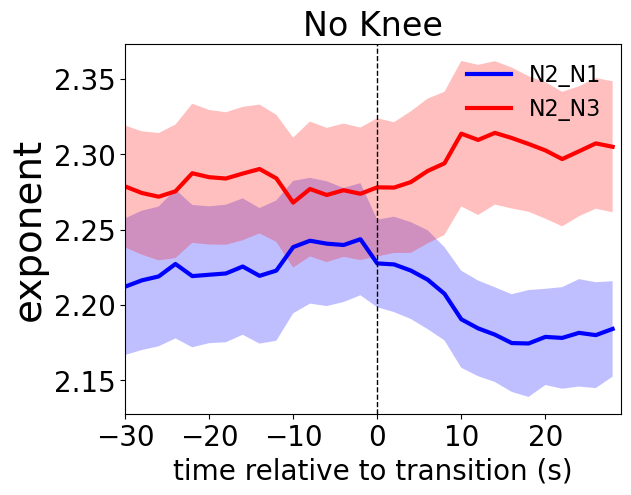

In [2]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/NREM/No_Knee'
subj_files = os.listdir(Data_path)
subj_files = [file for file in subj_files]
subj_files = sorted(subj_files)

#start a FOOOF object
fm1 = FOOOFGroup()

#create empty vector to store values
S_K = np.ones([34,40]) * np.nan

R_K = np.ones([34,40]) * np.nan

K_K = np.ones([34,40]) * np.nan

O_K = np.ones([34,40]) * np.nan

# actual loading of parameters
i = 0
for S in subj_files:
    fm1.load(S, Data_path)
    
    X = floor(len(fm1.get_params('aperiodic_params','exponent'))/40)
    Y =  fm1.get_params('aperiodic_params','exponent')[0:X*40]
    Z = np.reshape(Y, (int(len(Y)/40) , 40))   
    Y1 =  fm1.get_params('r_squared')[0:X*40]
    Z1 = np.reshape(Y1, (int(len(Y1)/40) , 40))  
    
    S_K[i,0:40] = np.nanmean(Z,axis = 0)
    R_K[i,0:40] = np.nanmean(Z1,axis= 0)
    #K_K[i,0:len(fm1.get_params('aperiodic_params','knee'))] = fm1.get_params('aperiodic_params','knee')
    #O_K[i,0:len(fm1.n_peaks_)] = fm1.get_params('aperiodic_params','exponent')
    i = i +1
    
# PLOTTING    
S_K_O = np.nanmean(S_K[::2],axis=0)
S_K_E = np.nanmean(S_K[1::2],axis=0)

S_K_Os = stats.sem(S_K[::2],0, nan_policy = 'omit')
S_K_Es = stats.sem(S_K[1::2],0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), S_K_O[0:30],color='b',linestyle='-',linewidth=3, label = 'N2_N1')
plt.fill_between(np.arange(-30,30,2),S_K_O[0:30]-S_K_Os[0:30], S_K_O[0:30]+S_K_Os[0:30],facecolor='b', alpha=0.25)

plt.plot(np.arange(-30,30,2),S_K_E[0:30],color='r',linestyle='-',linewidth=3, label = 'N2_N3')
plt.fill_between(np.arange(-30,30,2), S_K_E[0:30]-S_K_Es[0:30], S_K_E[0:30]+S_K_Es[0:30],facecolor='red', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('No Knee', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

#plt.savefig("Group_N2_trans_NK.svg", dpi = 600 )    

## R SQUARED

Text(0.5, 0, 'time relative to transition (s)')

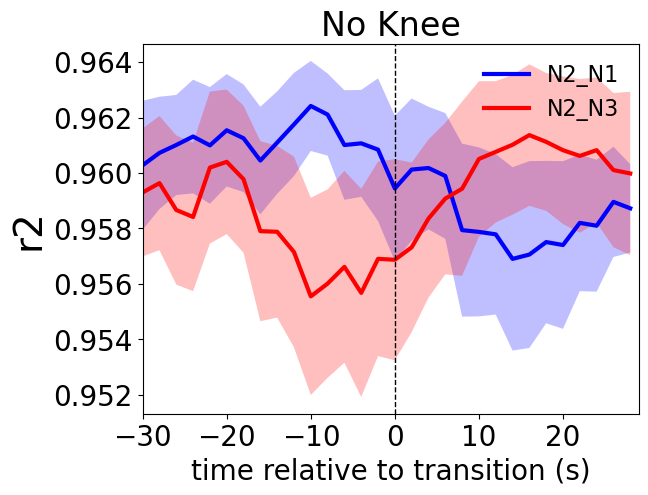

In [3]:
R_K_O = np.nanmean(R_K[::2],axis=0)
R_K_E = np.nanmean(R_K[1::2],axis=0)

R_K_Os = stats.sem(R_K[::2],0, nan_policy = 'omit')
R_K_Es = stats.sem(R_K[1::2],0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), R_K_O[0:30],color='b',linestyle='-',linewidth=3, label = 'N2_N1')
plt.fill_between(np.arange(-30,30,2),R_K_O[0:30]-R_K_Os[0:30], R_K_O[0:30]+R_K_Os[0:30],facecolor='b', alpha=0.25)

plt.plot(np.arange(-30,30,2),R_K_E[0:30],color='r',linestyle='-',linewidth=3, label = 'N2_N3')
plt.fill_between(np.arange(-30,30,2), R_K_E[0:30]-R_K_Es[0:30], R_K_E[0:30]+R_K_Es[0:30],facecolor='red', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('No Knee', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('r2', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

#plt.savefig("Group_N2_trans_NK.svg", dpi = 600 )

# KNEE MODEL

In [4]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/NREM/KNEE_K'
subj_files = os.listdir(Data_path)
subj_files = [file for file in subj_files]
subj_files = sorted(subj_files)

#start a FOOOF object
fm1 = FOOOFGroup()

S_K = np.ones([34,40]) * np.nan

R_K = np.ones([34,40]) * np.nan

K_K = np.ones([34,40]) * np.nan

O_K = np.ones([34,40]) * np.nan

i = 0
for S in subj_files:
    fm1.load(S, Data_path)
    
    X = floor(len(fm1.get_params('aperiodic_params','exponent'))/40)
    
    Y =  fm1.get_params('aperiodic_params','exponent')[0:X*40]
    Z = np.reshape(Y, (int(len(Y)/40) , 40))   
    
    Y1 =  fm1.get_params('r_squared')[0:X*40]
    Z1 = np.reshape(Y1, (int(len(Y1)/40) , 40))  
    
    Y2 = fm1.get_params('aperiodic_params','knee')[0:X*40]
    Z2 = np.reshape(Y2, (int(len(Y2)/40) , 40))  
    
    Y3 = fm1.get_params('aperiodic_params','offset')[0:X*40]
    Z3 = np.reshape(Y3, (int(len(Y3)/40) , 40)) 
 
    S_K[i,0:40] = np.nanmean(Z,axis = 0)
    R_K[i,0:40] = np.nanmean(Z1,axis= 0)
    K_K[i,0:40] = np.nanmean(Z2,axis= 0)
    O_K[i,0:40] = np.nanmean(Z3,axis= 0)
    i = i +1
    
S_K_O = np.nanmean(S_K[::2],axis=0)
S_K_E = np.nanmean(S_K[1::2],axis=0)
S_K_Os = stats.sem(S_K[::2],0, nan_policy = 'omit')
S_K_Es = stats.sem(S_K[1::2],0, nan_policy = 'omit')

R_K_O = np.nanmean(R_K[::2],axis=0)
R_K_E = np.nanmean(R_K[1::2],axis=0)
R_K_Os = stats.sem(R_K[::2],0, nan_policy = 'omit')
R_K_Es = stats.sem(R_K[1::2],0, nan_policy = 'omit')   

O_K_O = np.nanmean(O_K[::2],axis=0)
O_K_E = np.nanmean(O_K[1::2],axis=0)
O_K_Os = stats.sem(O_K[::2],0, nan_policy = 'omit')
O_K_Es = stats.sem(O_K[1::2],0, nan_policy = 'omit')   

Text(0.5, 0, 'time relative to transition (s)')

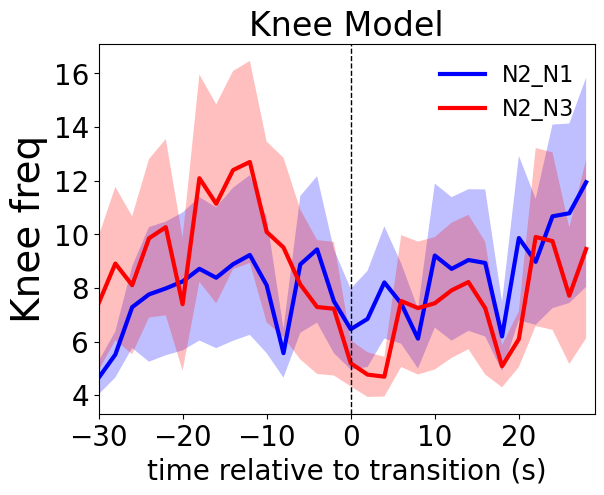

In [5]:
K_K2 = compute_knee_frequency(K_K, S_K)

K_K3 = np.ones([34,40])* np.nan
for i in range(0,K_K2.shape[0]):
    for ii in range(0,K_K2.shape[1]):
        knee = K_K2[i,ii]
        if knee < 1:
            K_K3[i,ii]= 1
        elif knee > 45:
            K_K3[i,ii]= 45
        else:
            K_K3[i,ii]=knee

K_K_O = np.nanmean(K_K3[::2],axis=0)
K_K_E = np.nanmean(K_K3[1::2],axis=0)
K_K_Os = stats.sem(K_K3[::2],0, nan_policy = 'omit')
K_K_Es = stats.sem(K_K3[1::2],0, nan_policy = 'omit')  

plt.plot(np.arange(-30,30,2), K_K_O[0:30],color='b',linestyle='-',linewidth=3, label = 'N2_N1')
plt.fill_between(np.arange(-30,30,2),K_K_O[0:30]-K_K_Os[0:30], K_K_O[0:30]+K_K_Os[0:30],facecolor='b', alpha=0.25)

plt.plot(np.arange(-30,30,2),K_K_E[0:30],color='r',linestyle='-',linewidth=3, label = 'N2_N3')
plt.fill_between(np.arange(-30,30,2), K_K_E[0:30]-K_K_Es[0:30], K_K_E[0:30]+K_K_Es[0:30],facecolor='red', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee Model', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Knee freq', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

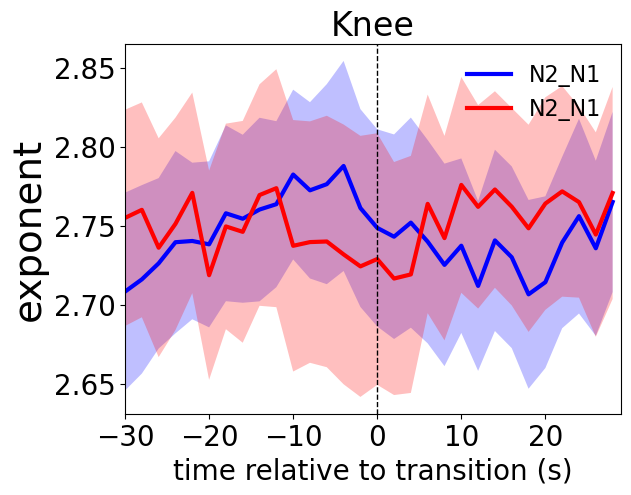

In [6]:
plt.plot(np.arange(-30,30,2), S_K_O[0:30],color='b',linestyle='-',linewidth=3, label = 'N2_N1')
plt.fill_between(np.arange(-30,30,2),S_K_O[0:30]-S_K_Os[0:30], S_K_O[0:30]+S_K_Os[0:30],facecolor='b', alpha=0.25)

plt.plot(np.arange(-30,30,2),S_K_E[0:30],color='r',linestyle='-',linewidth=3, label = 'N2_N1')
plt.fill_between(np.arange(-30,30,2), S_K_E[0:30]-S_K_Es[0:30], S_K_E[0:30]+S_K_Es[0:30],facecolor='red', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

plt.savefig("Group_N2_trans_K.svg", dpi = 600 )

Text(0.5, 0, 'time relative to transition (s)')

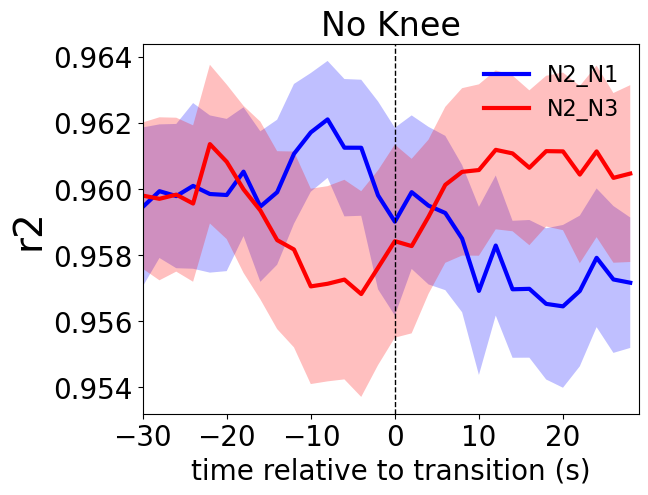

In [7]:
R_K_O = np.nanmean(R_K[::2],axis=0)
R_K_E = np.nanmean(R_K[1::2],axis=0)

R_K_Os = stats.sem(R_K[::2],0, nan_policy = 'omit')
R_K_Es = stats.sem(R_K[1::2],0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), R_K_O[0:30],color='b',linestyle='-',linewidth=3, label = 'N2_N1')
plt.fill_between(np.arange(-30,30,2),R_K_O[0:30]-R_K_Os[0:30], R_K_O[0:30]+R_K_Os[0:30],facecolor='b', alpha=0.25)

plt.plot(np.arange(-30,30,2),R_K_E[0:30],color='r',linestyle='-',linewidth=3, label = 'N2_N3')
plt.fill_between(np.arange(-30,30,2), R_K_E[0:30]-R_K_Es[0:30], R_K_E[0:30]+R_K_Es[0:30],facecolor='red', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('No Knee', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('r2', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

#plt.savefig("Group_N2_trans_NK.svg", dpi = 600 )

# STATS

In [8]:
t, p, H0 = mne.stats.permutation_cluster_test([S_K[::2][0:16],S_K[1::2][0:16]], n_permutations=5000, threshold=0.05, tail=0)

stat_fun(H1): min=0.000592 max=0.939651
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]

ValueError: too many values to unpack (expected 3)

In [9]:
cluster_p_values

NameError: name 'cluster_p_values' is not defined

In [10]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/REM/N_R/KNEE'

subj_files = os.listdir(Data_path)
subj_files = [file for file in subj_files]
subj_files = sorted(subj_files)

In [11]:
fm1 = FOOOFGroup()
S_K = np.ones([34,40]) * np.nan

R_K = np.ones([34,40]) * np.nan

K_K = np.ones([34,40]) * np.nan

O_K = np.ones([34,40]) * np.nan

i = 0
for S in subj_files:
    fm1.load(S, Data_path)
    
    X = floor(len(fm1.get_params('aperiodic_params','exponent'))/40)
    
    Y =  fm1.get_params('aperiodic_params','exponent')[0:X*40]
    Z = np.reshape(Y, (int(len(Y)/40) , 40))   
    
    Y1 =  fm1.get_params('r_squared')[0:X*40]
    Z1 = np.reshape(Y1, (int(len(Y1)/40) , 40))  
    
    Y2 = fm1.get_params('aperiodic_params','knee')[0:X*40]
    Z2 = np.reshape(Y2, (int(len(Y2)/40) , 40))  
    
    Y3 = fm1.get_params('aperiodic_params','offset')[0:X*40]
    Z3 = np.reshape(Y3, (int(len(Y3)/40) , 40)) 
 
    S_K[i,0:40] = np.nanmean(Z,axis = 0)
    R_K[i,0:40] = np.nanmean(Z1,axis= 0)
    K_K[i,0:40] = np.nanmean(Z2,axis= 0)
    O_K[i,0:40] = np.nanmean(Z3,axis= 0)
    i = i +1
    
S_K_O = np.nanmean(S_K[::2],axis=0)
S_K_E = np.nanmean(S_K[1::2],axis=0)
S_K_Os = stats.sem(S_K[::2],0, nan_policy = 'omit')
S_K_Es = stats.sem(S_K[1::2],0, nan_policy = 'omit')

R_K_O = np.nanmean(R_K[::2],axis=0)
R_K_E = np.nanmean(R_K[1::2],axis=0)
R_K_Os = stats.sem(R_K[::2],0, nan_policy = 'omit')
R_K_Es = stats.sem(R_K[1::2],0, nan_policy = 'omit')   



O_K_O = np.nanmean(O_K[::2],axis=0)
O_K_E = np.nanmean(O_K[1::2],axis=0)
O_K_Os = stats.sem(O_K[::2],0, nan_policy = 'omit')
O_K_Es = stats.sem(O_K[1::2],0, nan_policy = 'omit')   

/tmp/ipykernel_1623353/1255426245.py:28: RuntimeWarning: Mean of empty slice
  S_K[i,0:40] = np.nanmean(Z,axis = 0)
/tmp/ipykernel_1623353/1255426245.py:29: RuntimeWarning: Mean of empty slice
  R_K[i,0:40] = np.nanmean(Z1,axis= 0)
/tmp/ipykernel_1623353/1255426245.py:30: RuntimeWarning: Mean of empty slice
  K_K[i,0:40] = np.nanmean(Z2,axis= 0)
/tmp/ipykernel_1623353/1255426245.py:31: RuntimeWarning: Mean of empty slice
  O_K[i,0:40] = np.nanmean(Z3,axis= 0)


Text(0.5, 0, 'time relative to transition (s)')

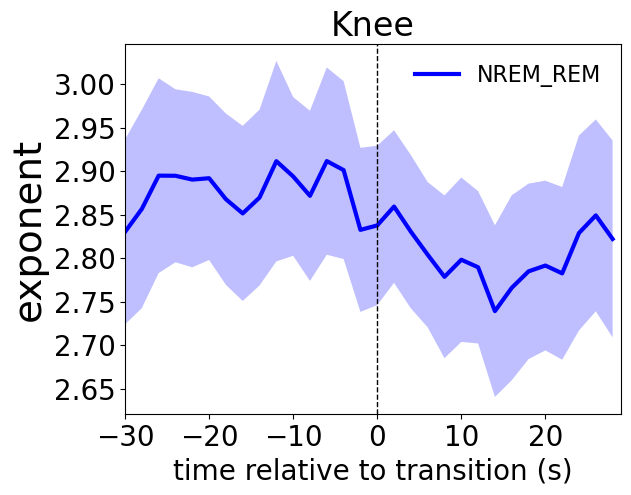

In [12]:
S_Km = np.nanmean(S_K,axis=0)
S_Ks = stats.sem(S_K,0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), S_Km[0:30],color='b',linestyle='-',linewidth=3, label = 'NREM_REM')
plt.fill_between(np.arange(-30,30,2),S_Km[0:30]-S_Ks[0:30], S_Km[0:30]+S_Ks[0:30],facecolor='b', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

In [13]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/REM/KNEE'
subj_files = os.listdir(Data_path)
subj_files = [file for file in subj_files]
subj_files = sorted(subj_files)

FileNotFoundError: [Errno 2] No such file or directory: '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/REM/KNEE'

In [14]:
fm1 = FOOOFGroup()
S_K = np.ones([34,40]) * np.nan

R_K = np.ones([34,40]) * np.nan

K_K = np.ones([34,40]) * np.nan

O_K = np.ones([34,40]) * np.nan

i = 0
for S in subj_files:
    fm1.load(S, Data_path)
    
    X = floor(len(fm1.get_params('aperiodic_params','exponent'))/40)
    Y =  fm1.get_params('aperiodic_params','exponent')[0:X*40]
    Z = np.reshape(Y, (int(len(Y)/40) , 40))   
    Y1 =  fm1.get_params('r_squared')[0:X*40]
    Z1 = np.reshape(Y1, (int(len(Y1)/40) , 40))  
    
    S_K[i,0:40] = np.nanmean(Z,axis = 0)
    R_K[i,0:40] = np.nanmean(Z1,axis= 0)
    #K_K[i,0:len(fm1.get_params('aperiodic_params','knee'))] = fm1.get_params('aperiodic_params','knee')
    #O_K[i,0:len(fm1.n_peaks_)] = fm1.get_params('aperiodic_params','exponent')
    i = i +1
    
    

FileNotFoundError: [Errno 2] No such file or directory: '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/REM/KNEE/VP01__NtoR.set_K_REM_trans'

In [318]:
S_Km = np.nanmean(S_K,axis=0)

S_Ks = stats.sem(S_K,0, nan_policy = 'omit')


Text(0.5, 0, 'time relative to transition (s)')

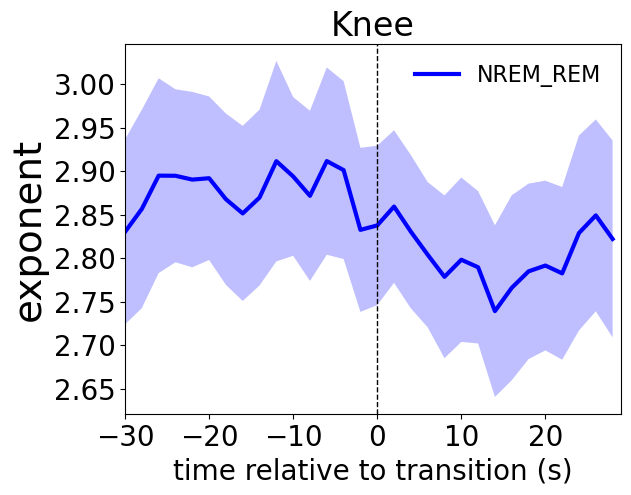

In [319]:
plt.plot(np.arange(-30,30,2), S_Km[0:30],color='b',linestyle='-',linewidth=3, label = 'NREM_REM')
plt.fill_between(np.arange(-30,30,2),S_Km[0:30]-S_Ks[0:30], S_Km[0:30]+S_Ks[0:30],facecolor='b', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

# GET THE KNEE VALUES THROUGH TRANSITIONS

In [425]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/REM/N_R/KNEE'
subj_files = os.listdir(Data_path)
subj_files = [file for file in subj_files]
subj_files = sorted(subj_files)

fm1 = FOOOFGroup()
S_K = np.ones([34,40]) * np.nan

R_K = np.ones([34,40]) * np.nan

K_K = np.ones([34,40]) * np.nan

O_K = np.ones([34,40]) * np.nan

i = 0
for S in subj_files:
    fm1.load(S, Data_path)
    
    X = floor(len(fm1.get_params('aperiodic_params','exponent'))/40)
    
    Y =  fm1.get_params('aperiodic_params','exponent')[0:X*40]
    Z = np.reshape(Y, (int(len(Y)/40) , 40))   
    
    Y1 =  fm1.get_params('r_squared')[0:X*40]
    Z1 = np.reshape(Y1, (int(len(Y1)/40) , 40))  
    
    Y2 = fm1.get_params('aperiodic_params','knee')[0:X*40]
    Z2 = np.reshape(Y2, (int(len(Y2)/40) , 40))  
    
    Y3 = fm1.get_params('aperiodic_params','offset')[0:X*40]
    Z3 = np.reshape(Y3, (int(len(Y3)/40) , 40)) 
 
    S_K[i,0:40] = np.nanmean(Z,axis = 0)
    R_K[i,0:40] = np.nanmean(Z1,axis= 0)
    K_K[i,0:40] = np.nanmean(Z2,axis= 0)
    O_K[i,0:40] = np.nanmean(Z3,axis= 0)
    i = i +1
    
S_K_O = np.nanmean(S_K[::2],axis=0)
S_K_E = np.nanmean(S_K[1::2],axis=0)
S_K_Os = stats.sem(S_K[::2],0, nan_policy = 'omit')
S_K_Es = stats.sem(S_K[1::2],0, nan_policy = 'omit')

R_K_O = np.nanmean(R_K[::2],axis=0)
R_K_E = np.nanmean(R_K[1::2],axis=0)
R_K_Os = stats.sem(R_K[::2],0, nan_policy = 'omit')
R_K_Es = stats.sem(R_K[1::2],0, nan_policy = 'omit')   

O_K_O = np.nanmean(O_K[::2],axis=0)
O_K_E = np.nanmean(O_K[1::2],axis=0)
O_K_Os = stats.sem(O_K[::2],0, nan_policy = 'omit')
O_K_Es = stats.sem(O_K[1::2],0, nan_policy = 'omit')   

/tmp/ipykernel_471155/165736615.py:34: RuntimeWarning: Mean of empty slice
  S_K[i,0:40] = np.nanmean(Z,axis = 0)
/tmp/ipykernel_471155/165736615.py:35: RuntimeWarning: Mean of empty slice
  R_K[i,0:40] = np.nanmean(Z1,axis= 0)
/tmp/ipykernel_471155/165736615.py:36: RuntimeWarning: Mean of empty slice
  K_K[i,0:40] = np.nanmean(Z2,axis= 0)
/tmp/ipykernel_471155/165736615.py:37: RuntimeWarning: Mean of empty slice
  O_K[i,0:40] = np.nanmean(Z3,axis= 0)


Text(0.5, 0, 'time relative to transition (s)')

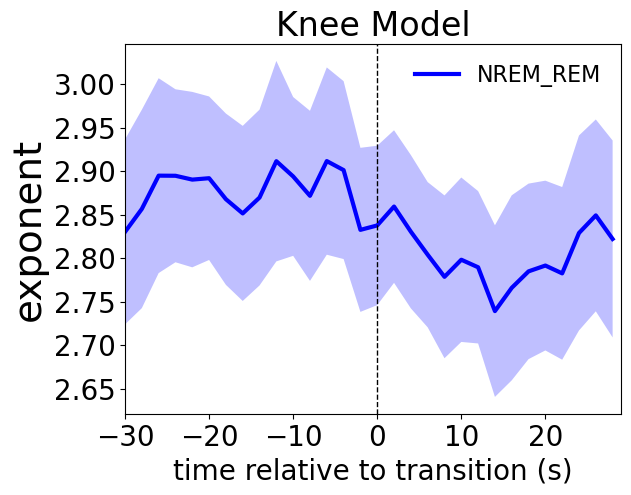

In [426]:
S_Km = np.nanmean(S_K,axis=0)

S_Ks = stats.sem(S_K,0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), S_Km[0:30],color='b',linestyle='-',linewidth=3, label = 'NREM_REM')
plt.fill_between(np.arange(-30,30,2),S_Km[0:30]-S_Ks[0:30], S_Km[0:30]+S_Ks[0:30],facecolor='b', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee Model', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

Text(0.5, 0, 'time relative to transition (s)')

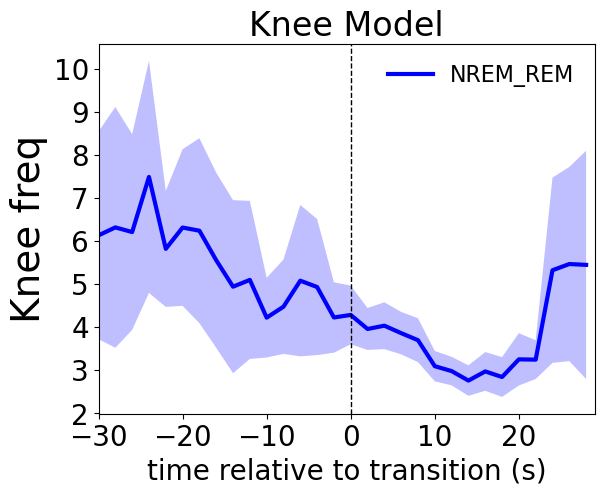

In [427]:
K_K2 = compute_knee_frequency(K_K, S_K)

K_K3 = np.ones([34,40])* np.nan
for i in range(0,K_K2.shape[0]):
    for ii in range(0,K_K2.shape[1]):
        knee = K_K2[i,ii]
        if knee < 1:
            K_K3[i,ii]= 1
        elif knee > 45:
            K_K3[i,ii]= 45
        else:
            K_K3[i,ii]=knee

K_K_O = np.nanmean(K_K3,axis=0)
K_K_Os = stats.sem(K_K3,0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), K_K_O[0:30],color='b',linestyle='-',linewidth=3, label = 'NREM_REM')
plt.fill_between(np.arange(-30,30,2),K_K_O[0:30]-K_K_Os[0:30], K_K_O[0:30]+K_K_Os[0:30],facecolor='b', alpha=0.25)


plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee Model', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Knee freq', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

In [430]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/REM/R_N/Knee'
subj_files = os.listdir(Data_path)
subj_files = [file for file in subj_files]
subj_files = sorted(subj_files)

fm1 = FOOOFGroup()
S_K = np.ones([34,40]) * np.nan

R_K = np.ones([34,40]) * np.nan

K_K = np.ones([34,40]) * np.nan

O_K = np.ones([34,40]) * np.nan

i = 0
for S in subj_files:
    fm1.load(S, Data_path)
    
    X = floor(len(fm1.get_params('aperiodic_params','exponent'))/40)
    
    Y =  fm1.get_params('aperiodic_params','exponent')[0:X*40]
    Z = np.reshape(Y, (int(len(Y)/40) , 40))   
    
    Y1 =  fm1.get_params('r_squared')[0:X*40]
    Z1 = np.reshape(Y1, (int(len(Y1)/40) , 40))  
    
    Y2 = fm1.get_params('aperiodic_params','knee')[0:X*40]
    Z2 = np.reshape(Y2, (int(len(Y2)/40) , 40))  
    
    Y3 = fm1.get_params('aperiodic_params','offset')[0:X*40]
    Z3 = np.reshape(Y3, (int(len(Y3)/40) , 40)) 
 
    S_K[i,0:40] = np.nanmean(Z,axis = 0)
    R_K[i,0:40] = np.nanmean(Z1,axis= 0)
    K_K[i,0:40] = np.nanmean(Z2,axis= 0)
    O_K[i,0:40] = np.nanmean(Z3,axis= 0)
    i = i +1
    
S_K_O = np.nanmean(S_K[::2],axis=0)
S_K_E = np.nanmean(S_K[1::2],axis=0)
S_K_Os = stats.sem(S_K[::2],0, nan_policy = 'omit')
S_K_Es = stats.sem(S_K[1::2],0, nan_policy = 'omit')

R_K_O = np.nanmean(R_K[::2],axis=0)
R_K_E = np.nanmean(R_K[1::2],axis=0)
R_K_Os = stats.sem(R_K[::2],0, nan_policy = 'omit')
R_K_Es = stats.sem(R_K[1::2],0, nan_policy = 'omit')   

O_K_O = np.nanmean(O_K[::2],axis=0)
O_K_E = np.nanmean(O_K[1::2],axis=0)
O_K_Os = stats.sem(O_K[::2],0, nan_policy = 'omit')
O_K_Es = stats.sem(O_K[1::2],0, nan_policy = 'omit')   

/tmp/ipykernel_471155/621394576.py:34: RuntimeWarning: Mean of empty slice
  S_K[i,0:40] = np.nanmean(Z,axis = 0)
/tmp/ipykernel_471155/621394576.py:35: RuntimeWarning: Mean of empty slice
  R_K[i,0:40] = np.nanmean(Z1,axis= 0)
/tmp/ipykernel_471155/621394576.py:36: RuntimeWarning: Mean of empty slice
  K_K[i,0:40] = np.nanmean(Z2,axis= 0)
/tmp/ipykernel_471155/621394576.py:37: RuntimeWarning: Mean of empty slice
  O_K[i,0:40] = np.nanmean(Z3,axis= 0)


Text(0.5, 0, 'time relative to transition (s)')

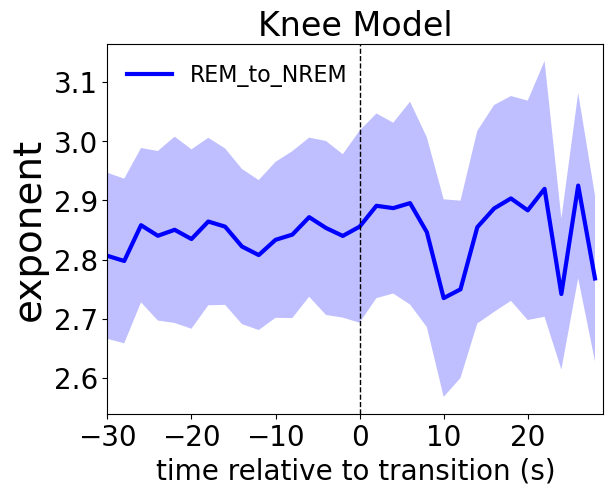

In [431]:
S_Km = np.nanmean(S_K,axis=0)

S_Ks = stats.sem(S_K,0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), S_Km[0:30],color='b',linestyle='-',linewidth=3, label = 'REM_to_NREM')
plt.fill_between(np.arange(-30,30,2),S_Km[0:30]-S_Ks[0:30], S_Km[0:30]+S_Ks[0:30],facecolor='b', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee Model', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

Text(0.5, 0, 'time relative to transition (s)')

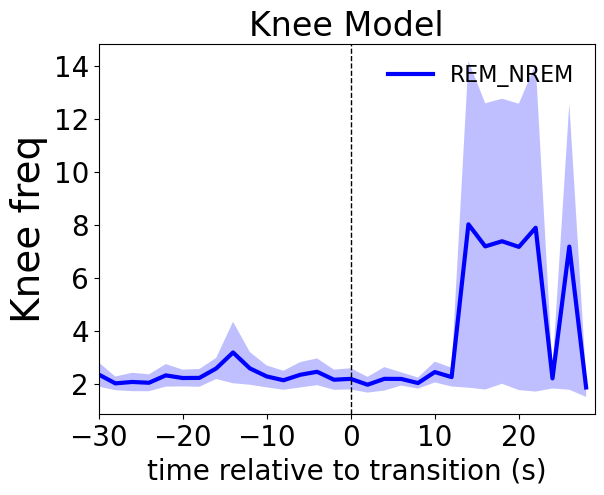

In [432]:
K_K2 = compute_knee_frequency(K_K, S_K)

K_K3 = np.ones([34,40])* np.nan
for i in range(0,K_K2.shape[0]):
    for ii in range(0,K_K2.shape[1]):
        knee = K_K2[i,ii]
        if knee < 1:
            K_K3[i,ii]= 1
        elif knee > 45:
            K_K3[i,ii]= 45
        else:
            K_K3[i,ii]=knee

K_K_O = np.nanmean(K_K3,axis=0)
K_K_Os = stats.sem(K_K3,0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), K_K_O[0:30],color='b',linestyle='-',linewidth=3, label = 'REM_NREM')
plt.fill_between(np.arange(-30,30,2),K_K_O[0:30]-K_K_Os[0:30], K_K_O[0:30]+K_K_Os[0:30],facecolor='b', alpha=0.25)


plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee Model', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Knee freq', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

# JUNE 23 - New files

In [55]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/*KCN2_FOOOFed_MT.json'
subj_files = np.sort(glob.glob(Data_path))


In [59]:
Exp_KCN2 = np.ones([17,2500]) * np.nan
Knee_KCN2 = np.ones([17,2500]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_KCN2[i,0:2500] = fm1.get_params('aperiodic_params','exponent')
    Knee_KCN2[i,0:2500] = fm1.get_params('aperiodic_params','knee')

    i=i+1

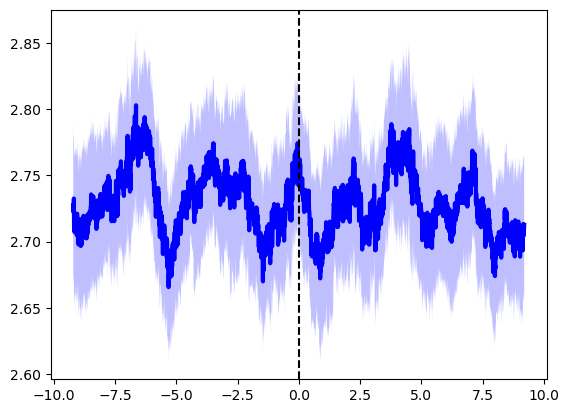

In [84]:
K_K_O = np.nanmean(Exp_KCN2,axis=0)[100:2400]
K_K_Os = stats.sem(Exp_KCN2,0, nan_policy = 'omit')[100:2400]
time = np.load('/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/Times.npy')
plt.plot(time[100:2400], K_K_O ,color='b',linestyle='-',linewidth=3, label = 'EXP - KCN2')
plt.fill_between(time[100:2400],K_K_O -K_K_Os, K_K_O+K_K_Os,facecolor='b', alpha=0.25)
plt.axvline(x = 0, color = 'k', linestyle='--',label = 'axvline - full height')


In [11]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/*FSN23_FOOOFed_MT.json'
subj_files = np.sort(glob.glob(Data_path))
Exp_sFS = np.ones([17,2500]) * np.nan
Knee_sFS = np.ones([17,2500]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_sFS[i,0:2500] = fm1.get_params('aperiodic_params','exponent')
    Knee_sFS[i,0:2500] = fm1.get_params('aperiodic_params','knee')

    i=i+1
    
    

(-2.0, 2.0)

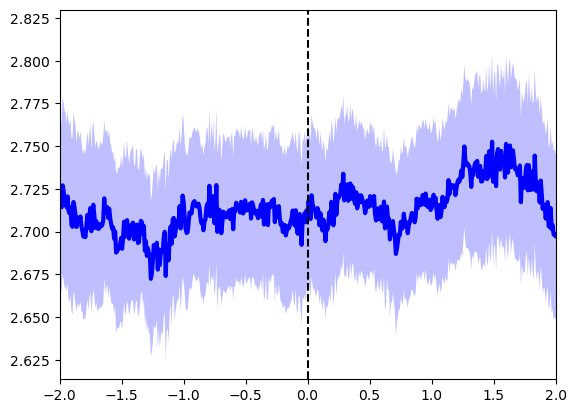

In [12]:
sK_K_O = np.nanmean(Exp_sFS,axis=0)[100:2400]
sK_K_Os = stats.sem(Exp_sFS,0, nan_policy = 'omit')[100:2400]
time = np.load('/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/Times.npy')
plt.plot(time[100:2400], sK_K_O ,color='b',linestyle='-',linewidth=3, label = 'EXP - KCN2')
plt.fill_between(time[100:2400],sK_K_O -sK_K_Os, sK_K_O+sK_K_Os,facecolor='b', alpha=0.25)
plt.axvline(x = 0, color = 'k', linestyle='--',label = 'axvline - full height')
plt.xlim(-2,2)

# Phasic Tonic

In [160]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/*PT_FOOOFed_MT.json'
subj_files = np.sort(glob.glob(Data_path))
Exp_sPT = np.ones([17,1250]) * np.nan
Knee_sPT = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_sPT[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    Knee_sPT[i,0:1250] = fm1.get_params('aperiodic_params','knee')

    i=i+1
    
    

In [161]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/*TP_FOOOFed_MT.json'
subj_files = np.sort(glob.glob(Data_path))
Exp_sTP = np.ones([17,1250]) * np.nan
Knee_sTP = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_sTP[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    Knee_sTP[i,0:1250] = fm1.get_params('aperiodic_params','knee')

    i=i+1

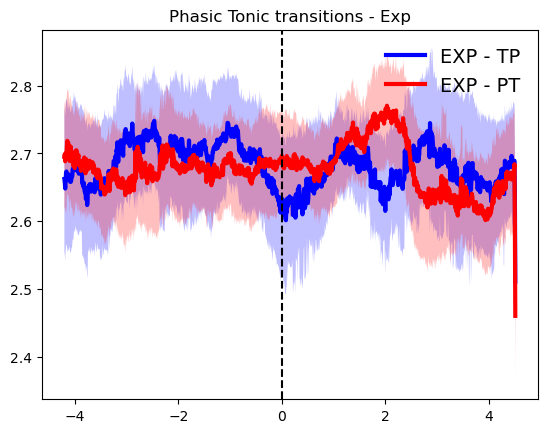

In [166]:
K_K_O = np.nanmean(Exp_sTP,axis=0)[100:1190]
K_K_Os = stats.sem(Exp_sTP,0, nan_policy = 'omit')[100:1190]
time = np.load('/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/Times.npy')
plt.plot(time[725:1815], K_K_O ,color='b',linestyle='-',linewidth=3, label = 'EXP - TP')
plt.fill_between(time[725:1815],K_K_O -K_K_Os, K_K_O+K_K_Os,facecolor='b', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)


K_K_On = np.nanmean(Exp_sPT,axis=0)[100:1190]
K_K_Osn = stats.sem(Exp_sPT,0, nan_policy = 'omit')[100:1190]
time = np.load('/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/Times.npy')
plt.plot(time[725:1815], K_K_On ,color='r',linestyle='-',linewidth=3, label = 'EXP - PT')
plt.fill_between(time[725:1815],K_K_On -K_K_Osn, K_K_On+K_K_Osn,facecolor='r', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)
plt.title("Phasic Tonic transitions - Exp")
plt.axvline(x = 0, color = 'k', linestyle = '--', label = 'axvline - full height')


# STIMS

In [5]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/*StimKC_FOOOFed_MT.json'
subj_files = np.sort(glob.glob(Data_path))
Exp_sKC = np.ones([17,1250]) * np.nan
Knee_sKC = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_sKC[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    Knee_sKC[i,0:1250] = fm1.get_params('aperiodic_params','knee')

    i=i+1
    
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/*StimNoKC_FOOOFed_MT.json'
subj_files = np.sort(glob.glob(Data_path))
Exp_snKC = np.ones([17,1250]) * np.nan
Knee_snKC = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_snKC[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    Knee_snKC[i,0:1250] = fm1.get_params('aperiodic_params','knee')

    i=i+1

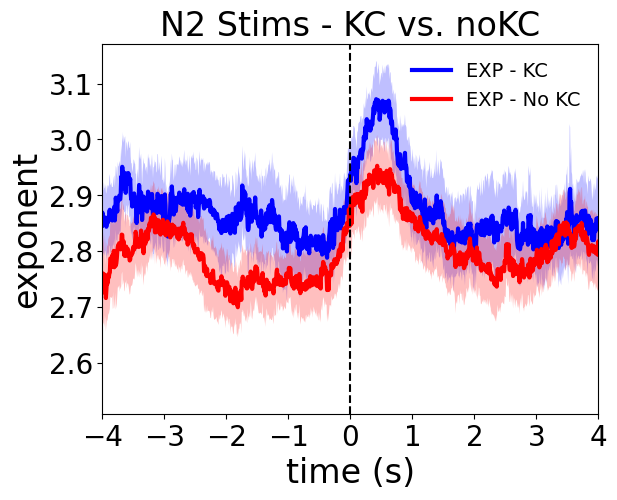

In [10]:
K_K_O = np.nanmean(Exp_sKC,axis=0)[100:1190]
K_K_Os = stats.sem(Exp_sKC,0, nan_policy = 'omit')[100:1190]
time = np.load('/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/Times.npy')
plt.plot(time[725:1815], K_K_O ,color='b',linestyle='-',linewidth=3, label = 'EXP - KC')
plt.fill_between(time[725:1815],K_K_O -K_K_Os, K_K_O+K_K_Os,facecolor='b', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)


K_K_On = np.nanmean(Exp_snKC,axis=0)[100:1190]
K_K_Osn = stats.sem(Exp_snKC,0, nan_policy = 'omit')[100:1190]
time = np.load('/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/Times.npy')
plt.plot(time[725:1815], K_K_On ,color='r',linestyle='-',linewidth=3, label = 'EXP - No KC')
plt.fill_between(time[725:1815],K_K_On -K_K_Osn, K_K_On+K_K_Osn,facecolor='r', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)
plt.title("N2 Stims - KC vs. noKC" , fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', label = 'axvline - full height')
plt.xlim(-4,4)
plt.ylabel("exponent", fontsize = 24)
plt.xlabel("time (s)", fontsize = 24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("/home/b1044271/Columbia/Plots/TR_StimN2_KCnoKC.svg", dpi = 600 )

In [7]:
X = [Exp_sKC, Exp_snKC]
F_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_test(X, threshold=None, n_permutations=5000, tail=0, 
                                   stat_fun=None, adjacency=None, n_jobs=None, seed=None,
                                   max_step=1, exclude=None, step_down_p=0, t_power=1, 
                                   out_type='indices', check_disjoint=False, buffer_size=1000, verbose=None)

cluster_p_values

Using a threshold of 4.149097
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 0 clusters


/tmp/ipykernel_1965368/1430598600.py:2: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  F_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_test(X, threshold=None, n_permutations=5000, tail=0,
/tmp/ipykernel_1965368/1430598600.py:2: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  F_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_test(X, threshold=None, n_permutations=5000, tail=0,
/tmp/ipykernel_1965368/1430598600.py:2: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  F_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_test(X, threshold=None, n_permutations=5000, tail=0,


array([], dtype=float64)

In [103]:
# KNEE CALCS
Knee_sKC2 = compute_knee_frequency(Knee_sKC,Exp_sKC)
Knee_snKC2 = compute_knee_frequency(Knee_snKC,Exp_snKC)

/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/utils/params.py:24: RuntimeWarning: invalid value encountered in power
  return knee ** (1./exponent)


In [133]:
i = 0
Knee_sKC3 = np.ones([17,1250]) * np.nan
for row in Knee_sKC2:
    row_values = []
    for value in row:
        if value > 1 or value < 45:
            row_values.append(value) 
        else:
            row_values.append(None) 
            
    Knee_sKC3[i,0:1250] = row_values
    i=i+1
    
i = 0
Knee_snKC3 = np.ones([17,1250]) * np.nan
for row in Knee_snKC2:
    row_values = []
    for value in row:
        if value > 1 or value < 45:
            row_values.append(value) 
        else:
            row_values.append(None) 
            
    Knee_snKC3[i,0:1250] = row_values
    i=i+1

Text(0.5, 1.0, 'Stims - KC noKC')

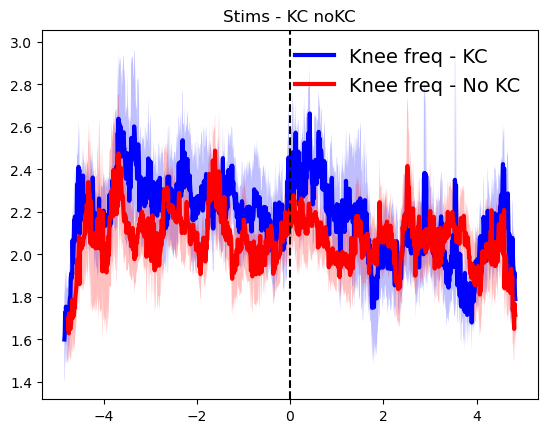

In [144]:
K_K_O2 = np.nanmean(Knee_sKC3,axis=0)[20:1230]
K_K_Os2 = stats.sem(Knee_sKC3,0, nan_policy = 'omit')[20:1230]
time = np.load('/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/Times.npy')
plt.plot(time[645:1855], K_K_O2 ,color='b',linestyle='-',linewidth=3, label = 'Knee freq - KC')
plt.fill_between(time[645:1855],K_K_O2 -K_K_Os2, K_K_O2+K_K_Os2,facecolor='b', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

K_K_On2 = np.nanmean(Knee_snKC3,axis=0)[30:1230]
K_K_Osn2 = stats.sem(Knee_snKC3,0, nan_policy = 'omit')[30:1230]
plt.plot(time[655:1855], K_K_On2 ,color='r',linestyle='-',linewidth=3, label = 'Knee freq - No KC')
plt.fill_between(time[655:1855],K_K_On2 -K_K_Osn2, K_K_On2+K_K_Osn2,facecolor='r', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.axvline(x = 0, color = 'k',linestyle='--' , label = 'axvline - full height')
plt.title("Stims - KC noKC")

## SLEEP STAGE TRANSITIONS

In [96]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/*N2toN1_FOOOFed_MT.json'
subj_files = np.sort(glob.glob(Data_path))
Exp_N21 = np.ones([17,2500]) * np.nan
Knee_N21 = np.ones([17,2500]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_N21[i,0:2500] = fm1.get_params('aperiodic_params','exponent')
    Knee_N21[i,0:2500] = fm1.get_params('aperiodic_params','knee')

    i=i+1

In [95]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/*N2toN3_FOOOFed_MT.json'
subj_files = np.sort(glob.glob(Data_path))
Exp_N23 = np.ones([17,2500]) * np.nan
Knee_N23 = np.ones([17,2500]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_N23[i,0:2500] = fm1.get_params('aperiodic_params','exponent')
    Knee_N23[i,0:2500] = fm1.get_params('aperiodic_params','knee')

    i=i+1

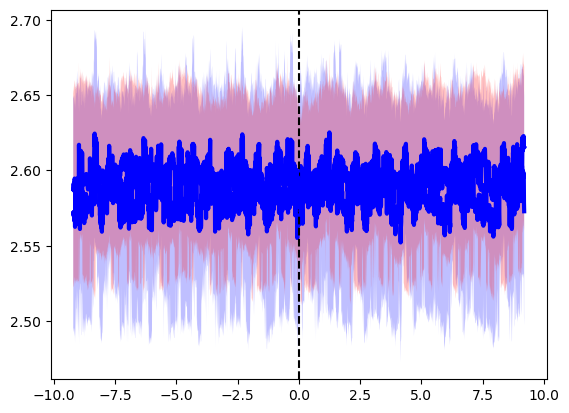

In [99]:
K_K_O = np.nanmean(Exp_N23,axis=0)[100:2400]
K_K_Os = stats.sem(Exp_N23,0, nan_policy = 'omit')[100:2400]
time = np.load('/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/Times.npy')
plt.plot(time[100:2400], K_K_O ,color='b',linestyle='-',linewidth=3, label = 'EXP - N23')
plt.fill_between(time[100:2400],K_K_O -K_K_Os, K_K_O+K_K_Os,facecolor='b', alpha=0.25)
plt.axvline(x = 0, color = 'k', linestyle='--',label = 'axvline - full height')


K_K_O2 = np.nanmean(Exp_N21,axis=0)[100:2400]
K_K_Os2 = stats.sem(Exp_N21,0, nan_policy = 'omit')[100:2400]
time = np.load('/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/Multitaper/Times.npy')
plt.plot(time[100:2400], K_K_O2 ,color='b',linestyle='-',linewidth=3, label = 'EXP - N21')
plt.fill_between(time[100:2400],K_K_O2 -K_K_Os2, K_K_O2 + K_K_Os2,facecolor='r', alpha=0.25)
